In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import pickle
import seaborn as sns
import os

import vdmlab as vdm

from tuning_curves_functions import get_tc, get_odd_firing_idx

import info.R063d2_info as r063d2
import info.R063d3_info as r063d3
import info.R063d4_info as r063d4
import info.R063d5_info as r063d5
import info.R063d6_info as r063d6
import info.R066d1_info as r066d1
import info.R066d2_info as r066d2
import info.R066d4_info as r066d4

In [2]:
pickle_filepath = 'E:\\code\\vandermeerlab\\code-python\\projects\\emily_shortcut\\cache\\pickled\\'
output_filepath = 'E:\\code\\vandermeerlab\\code-python\\projects\\emily_shortcut\\plots\\'
# pickle_filepath = 'C:\\Users\\Emily\\Code\\vandermeerlab\\code-python\\projects\\emily_shortcut\\cache\\pickled\\'
# output_filepath = 'C:\\Users\\Emily\\Code\\vandermeerlab\\code-python\\projects\\emily_shortcut\\plots\\'

In [3]:
info = r063d4

In [4]:
print(info.session_id)
pos = info.get_pos(info.pxl_to_cm)
csc = info.get_csc()
spikes = info.get_spikes()

tc = get_tc(info, pos, pickle_filepath)

pickled_spike_heatmaps = pickle_filepath + info.session_id + '_spike_heatmaps.pkl'
if os.path.isfile(pickled_spike_heatmaps):
    with open(pickled_spike_heatmaps, 'rb') as fileobj:
        spike_heatmaps = pickle.load(fileobj)
else:
    spikes = info.get_spikes()

    all_neurons = list(range(1, len(spikes['time'])))
    spike_heatmaps = vdm.get_heatmaps(all_neurons, spikes, pos)
    with open(pickled_spike_heatmaps, 'wb') as fileobj:
        pickle.dump(spike_heatmaps, fileobj)

exp_time = 'pauseB'

t_start = info.task_times[exp_time][0]
t_stop = info.task_times[exp_time][1]

t_start_idx = vdm.find_nearest_idx(np.array(csc['time']), t_start)
t_end_idx = vdm.find_nearest_idx(np.array(csc['time']), t_stop)

sliced_csc = dict()
sliced_csc['time'] = csc['time'][t_start_idx:t_end_idx]
sliced_csc['data'] = csc['data'][t_start_idx:t_end_idx]

swr_times, swr_idx, filtered_butter = vdm.detect_swr_hilbert(sliced_csc, fs=info.fs)


sort_idx = vdm.get_sort_idx(tc['u'])

odd_firing_idx = get_odd_firing_idx(tc['u'])


all_u_fields = vdm.find_fields(tc['u'])
all_shortcut_fields = vdm.find_fields(tc['shortcut'])
all_novel_fields = vdm.find_fields(tc['novel'])

u_compare = vdm.find_fields(tc['u'], hz_thres=3)
shortcut_compare = vdm.find_fields(tc['shortcut'], hz_thres=3)
novel_compare = vdm.find_fields(tc['novel'], hz_thres=3)

u_fields_unique = vdm.unique_fields(all_u_fields, shortcut_compare, novel_compare)
shortcut_fields_unique = vdm.unique_fields(all_shortcut_fields, u_compare, novel_compare)
novel_fields_unique = vdm.unique_fields(all_novel_fields, u_compare, shortcut_compare)

u_fields_size = vdm.sized_fields(u_fields_unique)
shortcut_fields_size = vdm.sized_fields(shortcut_fields_unique)
novel_fields_size = vdm.sized_fields(novel_fields_unique)

u_fields = vdm.get_single_field(u_fields_size)
shortcut_fields = vdm.get_single_field(shortcut_fields_size)
novel_fields = vdm.get_single_field(novel_fields_size)


these_fields = []
for key in u_fields:
    these_fields.append(key)

field_spikes = []
field_tc = []
for idx in sort_idx:
    if idx not in odd_firing_idx:
        if idx in these_fields:
            field_spikes.append(spikes['time'][idx])
            field_tc.append(tc['u'][idx])

R063d4
Number of SWR events found:  138


In [5]:
colours = ['#7f0000', '#b30000', '#d7301f', '#ef6548', '#ec7014', '#fe9929', '#78c679', '#238443', '#7fcdbb',
           '#41b6c4', '#1d91c0', '#225ea8', '#8c96c6', '#8c6bb1', '#7a0177', '#ae017e', '#f768a1', '#fa9fb5',
           '#fcc5c0', '#d9f0a3', '#addd8e', '#f7fcb9', '#fec44f', '#ffeda0', '#ffffbf', '#dd3497', '#9ebcda',
           '#88419d', '#8c6bb1', 'k', 'b', 'c', 'g', 'm', 'r', 'y', 'k', 'b', 'c', 'g', 'm', 'r', 'y',
           'k', 'b', 'c', 'g', 'm', 'r', 'y', 'k', 'b', 'c', 'g', 'm', 'r', 'y', 'k', 'b', 'c', 'g', 'm', 'r', 'y',
           'k', 'b', 'c', 'g', 'm', 'r', 'y', 'k', 'b', 'c', 'g', 'm', 'r', 'y', 'k', 'b', 'c', 'g', 'm', 'r', 'y']

# x = [1,2,3]
# for colour in colours:
#     print(colour)
#     plt.plot(x, x, color=colour)
#     plt.fill_between(x, 0, x, facecolor=colour)
#     plt.show()


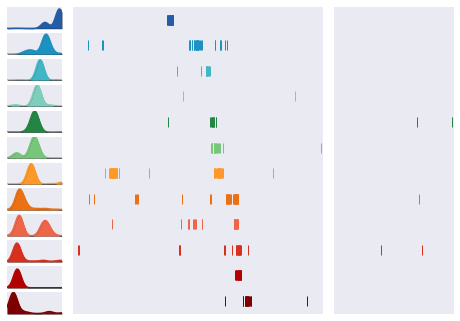

In [8]:
# Run time
start_time = info.task_times['phase3'][0]+190
stop_time = info.task_times['phase3'][0]+210

# start_time = info.task_times['phase3'][0]+235
# stop_time = info.task_times['phase3'][0]+250

# start_time = info.task_times['phase2'][0]+860
# stop_time = info.task_times['phase2'][0]+880

# SWR time
# idx = 39
idx = 46
start_time_swr = swr_times['start'][idx]
stop_time_swr = swr_times['stop'][idx]


rows = 12
cols = 7
fig = plt.figure()
ax1 = plt.subplot2grid((rows, cols), (0, 1), rowspan=rows, colspan=4)
ax2 = plt.subplot2grid((rows, cols), (0, 5), rowspan=rows, colspan=2)

location = 1
for i, neuron_spikes in enumerate(field_spikes):
    ax1.plot(neuron_spikes, np.ones(len(neuron_spikes))+location, '|', color=colours[i], ms=10, mew=1)
    location += 2
ax1.set_xlim([start_time, stop_time])
ax1.set_ylim([1, location])
plt.setp(ax1, xticks=[], xticklabels=[], yticks=[])

location = 1
for i, neuron_spikes in enumerate(field_spikes):
    ax2.plot(neuron_spikes, np.ones(len(neuron_spikes))+location, '|', color=colours[i], ms=10, mew=1)
    location += 2
ax2.set_xlim([start_time_swr, stop_time_swr])
ax2.set_ylim([1, location])
plt.setp(ax2, xticks=[], xticklabels=[], yticks=[])

x = list(range(0, len(field_tc[0])))

for ax_loc in range(0, rows):
    ax = plt.subplot2grid((rows, cols), (ax_loc, 0))

    idx = rows - ax_loc - 1
    ax.plot(field_tc[idx], color=colours[idx])
    ax.fill_between(x, 0, field_tc[idx], facecolor=colours[idx])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.setp(ax, xticks=[], xticklabels=[], yticks=[])

sns.despine()
plt.show()
# savepath = output_filepath + info.session_id + '_sequence-swr1.png'
# plt.savefig(savepath, dpi=300, bbox_inches='tight')
# plt.close()